# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [1]:
import pandas as pd
import numpy as np 

# Challenge 1

#### Read the `employees` dataset from Ironhack's database:
* db: `employees`
* table: `employees`

Save your data in a variable called `employees`.

In [7]:
employees = pd.read_csv('/Users/bert/Desktop/dataV2-labs/module-2/Pivot-Table-Correlation/Employees2.csv')
employees.shape
employees.head()

,Department,Education,Title,Name,Years,Salary
0,Admin,Master,associate,David,4,58
1,IT,Master,associate,Thomas,7,45
2,Admin,Master,associate,Diana,10,52
3,Admin,Master,VP,Manuella,15,33
4,Sales,Master,Analyst,Carla,6,38


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [10]:
employees_dep = employees.groupby(by='Department').agg({'Salary': 'mean'})
employees_dep

,Salary
Department,
Admin,76.325203
HR,74.237705
IT,70.671642
Sales,73.132231


In [12]:
employees_dep_2 = employees.pivot_table(index=['Department'], values=['Salary'])
employees_dep_2

#Note to myself here I don't need to specify the aggfunc=.... because the default = mean.

,Salary
Department,
Admin,76.325203
HR,74.237705
IT,70.671642
Sales,73.132231


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [14]:
dep_title = employees.pivot_table(index=['Department', 'Title'], values=['Salary'])
dep_title

Salary
Department Title               
Admin      Analyst    77.736842
           VP         75.571429
           associate  75.813953
HR         Analyst    71.404762
           VP         75.441176
           associate  75.934783
IT         Analyst    69.600000
           VP         74.000000
           associate  68.095238
Sales      Analyst    76.074074
           VP         66.675000
           associate  76.814815

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [46]:
table_years = employees.pivot_table(index=['Title'], columns=['Years'], values=['Salary'], aggfunc=np.mean)
table_years 

Salary                                                         \
Years             1          2          3          4          5          6    
Title                                                                         
Analyst    75.000000  63.384615  73.388889  77.600000  77.615385  87.444444   
VP         74.714286  83.200000  69.000000  82.333333  80.000000  61.071429   
associate  77.333333  83.250000  83.562500  73.300000  64.333333  74.454545   

                                                                             \
Years             7          8          9          10         11         12   
Title                                                                         
Analyst    67.000000  78.000000  86.454545  73.666667  71.181818  68.642857   
VP         78.692308  54.181818  65.666667  70.400000  79.363636  76.222222   
associate  70.166667  69.500000  76.090909  73.941176  73.750000  77.700000   

                                            
Years             13         14         15  
Title                                       
Analyst    69.571429  70.000000  71.200000  
VP         87.000000  74.785714  72.272727  
associate  62.222222  62.800000  64.500000

#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [54]:
title_dep_s = employees.pivot_table(index=['Department', 'Title'], values=['Salary', 'Name'], aggfunc={'Salary':np.mean, 'Name': np.count_nonzero}) 
title_dep_s

Name     Salary
Department Title                     
Admin      Analyst      38  77.736842
           VP           42  75.571429
           associate    43  75.813953
HR         Analyst      42  71.404762
           VP           34  75.441176
           associate    46  75.934783
IT         Analyst      45  69.600000
           VP           47  74.000000
           associate    42  68.095238
Sales      Analyst      54  76.074074
           VP           40  66.675000
           associate    27  76.814815

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [49]:
dept_std = employees.pivot_table(index=['Department', 'Title'], values=['Salary'], aggfunc={'Salary': [np.min, np.max, np.median, np.std]})
dept_std

Salary                        
                       amax  amin median        std
Department Title                                   
Admin      Analyst    120.0  33.0   80.5  26.335347
           VP         120.0  31.0   75.5  24.927351
           associate  119.0  30.0   79.0  26.524253
HR         Analyst    119.0  31.0   72.5  25.093056
           VP         119.0  32.0   76.5  26.594817
           associate  119.0  30.0   76.0  28.063739
IT         Analyst    119.0  30.0   69.0  28.418464
           VP         120.0  31.0   71.0  25.568323
           associate  117.0  33.0   59.5  28.557866
Sales      Analyst    120.0  30.0   72.0  27.855999
           VP         119.0  30.0   60.0  27.017931
           associate  120.0  31.0   79.0  28.266638

In [ ]:
"""
Min & Max ar simular the same between an Analyst, VP and associate and that over all different Departments.
It doesn't make sense that the median of the IT associate is less than those of the Analyst or VP. 
"""

#### Based on your comments, fill the missing values with an appropriate value.

In [52]:
# There are no missing values as I can see above. 
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Department  500 non-null    object
 1   Education   500 non-null    object
 2   Title       500 non-null    object
 3   Name        500 non-null    object
 4   Years       500 non-null    int64 
 5   Salary      500 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 23.6+ KB


#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [58]:
stake_holders = employees.pivot_table(index='Department', values=['Name', 'Salary'], aggfunc={'Name': 'count', 'Salary':np.sum})
stake_holders

,Name,Salary
Department,,
Admin,123,9388
HR,122,9057
IT,134,9470
Sales,121,8849


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [61]:
mean_year = employees.pivot_table(index=['Department', 'Title'], values=['Years', 'Salary'], aggfunc={'Years': 'count', 'Salary': np.mean})
mean_year

Salary  Years
Department Title                      
Admin      Analyst    77.736842     38
           VP         75.571429     42
           associate  75.813953     43
HR         Analyst    71.404762     42
           VP         75.441176     34
           associate  75.934783     46
IT         Analyst    69.600000     45
           VP         74.000000     47
           associate  68.095238     42
Sales      Analyst    76.074074     54
           VP         66.675000     40
           associate  76.814815     27

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

# Challenge 2

#### Read the `fitbit` dataset from Ironhack's database:
* db: `fitbit`
* table: `fitbit`

Save your data in a variable called `fitbit`.

In [66]:
fitbit = pd.read_csv('/Users/bert/Desktop/dataV2-labs/module-2/Pivot-Table-Correlation/Fitbit2.csv')
fitbit.shape
fitbit.head()


,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [67]:
#Exploring the data_types 
fitbit.dtypes

Date                           object
Calorie burned                  int64
Steps                           int64
Distance                      float64
Floors                          int64
Minutes Sedentary             float64
Minutes Lightly Active          int64
Minutes Fairly Active           int64
Minutes Very Active             int64
Activity Calories               int64
MinutesOfSleep                  int64
MinutesOfBeingAwake             int64
NumberOfAwakings                int64
LengthOfRestInMinutes           int64
Distance_miles                float64
Days                           object
Days_encoded                  float64
Work_or_Weekend                 int64
Hours Sleep                   float64
Sleep efficiency              float64
Yesterday_sleep               float64
Yesterday_sleep_efficiency    float64
Months                         object
Months_encoded                  int64
dtype: object

In [68]:
fitbit.describe()
#Here we can have a quick look to a few descriptive statistics to get a first interpretation

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,...,NumberOfAwakings,LengthOfRestInMinutes,Distance_miles,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months_encoded
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,...,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,...,16.196185,321.343324,5.312180,3.010899,0.713896,4.841326,76.362799,4.818529,76.119842,6.501362
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,...,10.757622,170.786726,2.118801,1.998604,0.452555,2.579205,32.973194,2.584930,33.206279,3.459267
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,...,7.000000,248.000000,3.824539,1.000000,0.000000,3.733333,86.238532,3.725000,86.233673,3.500000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,...,16.000000,370.000000,5.151166,3.000000,1.000000,5.616667,89.433962,5.600000,89.433962,7.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,...,24.000000,440.500000,6.561678,5.000000,1.000000,6.675000,92.438419,6.650000,92.438419,9.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,...,45.000000,607.000000,12.707037,6.000000,1.000000,9.216667,100.000000,9.216667,100.000000,12.000000


In [69]:
fitbit.corr()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,...,NumberOfAwakings,LengthOfRestInMinutes,Distance_miles,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months_encoded
Calorie burned,1.000000,0.255305,0.292790,0.130757,0.125353,0.209540,0.188256,0.197881,-0.130758,0.011485,...,0.030490,0.017460,0.292790,-0.041630,0.064943,0.011485,0.040965,0.048411,0.021207,0.005841
Steps,0.255305,1.000000,0.779678,0.306511,0.076906,0.393010,0.303244,0.571452,-0.160568,0.130986,...,0.106591,0.133405,0.779678,-0.024671,0.006498,0.130986,0.128463,0.089991,0.083499,-0.097077
Distance,0.292790,0.779678,1.000000,0.382940,0.160632,0.455272,0.348113,0.759310,-0.246853,0.129442,...,0.091095,0.134550,1.000000,-0.056472,0.069438,0.129442,0.126663,0.107858,0.075439,-0.122106
Floors,0.130757,0.306511,0.382940,1.000000,0.057812,-0.085992,0.278408,0.399503,-0.155532,0.069464,...,0.043459,0.075864,0.382940,-0.243848,0.296749,0.069464,0.057192,0.111600,0.092766,-0.032347
Minutes Sedentary,0.125353,0.076906,0.160632,0.057812,1.000000,0.217021,0.084137,0.105963,-0.161446,0.204242,...,0.178387,0.208539,0.160632,-0.069168,0.071185,0.204242,0.251996,0.069396,0.058520,-0.107068
Minutes Lightly Active,0.209540,0.393010,0.455272,-0.085992,0.217021,1.000000,0.014288,-0.034425,-0.219892,0.105048,...,0.087150,0.105406,0.455272,0.202433,-0.197896,0.105048,0.101216,0.020973,0.040472,-0.066958
Minutes Fairly Active,0.188256,0.303244,0.348113,0.278408,0.084137,0.014288,1.000000,0.337839,-0.204562,0.114950,...,0.100498,0.123034,0.348113,-0.098541,0.110282,0.114950,0.092485,0.191620,0.136397,0.105570
Minutes Very Active,0.197881,0.571452,0.759310,0.399503,0.105963,-0.034425,0.337839,1.000000,-0.187309,0.108018,...,0.099859,0.115641,0.759310,-0.111718,0.103940,0.108018,0.106693,0.120500,0.073853,-0.085153
Activity Calories,-0.130758,-0.160568,-0.246853,-0.155532,-0.161446,-0.219892,-0.204562,-0.187309,1.000000,-0.005804,...,0.022757,-0.004992,-0.246853,-0.074707,0.044292,-0.005804,-0.020122,-0.074408,-0.064989,-0.004207
MinutesOfSleep,0.011485,0.130986,0.129442,0.069464,0.204242,0.105048,0.114950,0.108018,-0.005804,1.000000,...,0.780512,0.997184,0.129442,-0.033913,0.094152,1.000000,0.807964,0.148113,0.095999,-0.127980


In [85]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        367 non-null    object 
 1   Calorie burned              367 non-null    int64  
 2   Steps                       367 non-null    int64  
 3   Distance                    367 non-null    float64
 4   Floors                      367 non-null    int64  
 5   Minutes Sedentary           367 non-null    float64
 6   Minutes Lightly Active      367 non-null    int64  
 7   Minutes Fairly Active       367 non-null    int64  
 8   Minutes Very Active         367 non-null    int64  
 9   Activity Calories           367 non-null    int64  
 10  MinutesOfSleep              367 non-null    int64  
 11  MinutesOfBeingAwake         367 non-null    int64  
 12  NumberOfAwakings            367 non-null    int64  
 13  LengthOfRestInMinutes       367 non

#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [70]:
correlation = fitbit['Minutes Very Active'].corr(fitbit['Steps'])
correlation

0.5714518481062608

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

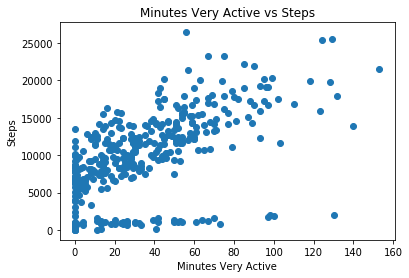

In [75]:

plt.scatter(fitbit['Minutes Very Active'],fitbit['Steps'])
plt.title('Minutes Very Active vs Steps')
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.show()

#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [ ]:
"""
We can see that there's a kind of correlation between Minutes Very Active & Steps. 
On the first we can also see that if you are more active you normally have more steps. 
For a good impression we should further investigate 

"""

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [77]:
correlation_sed = fitbit['Minutes Sedentary'].corr(fitbit['Steps'])
correlation_sed

0.07690608062990091

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

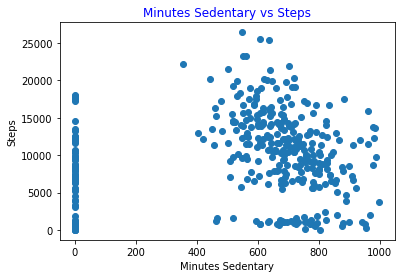

In [83]:
plt.scatter(fitbit['Minutes Sedentary'],fitbit['Steps'])
plt.title('Minutes Sedentary vs Steps', color='blue')
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.show()

In [ ]:
"""
As we could expect form the correlation calculation we see that there is not really a correlation! 
"""

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [82]:
correlation_sleep = fitbit['MinutesOfSleep'].corr(fitbit['Steps'])
correlation_sleep

0.1309856595083638

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

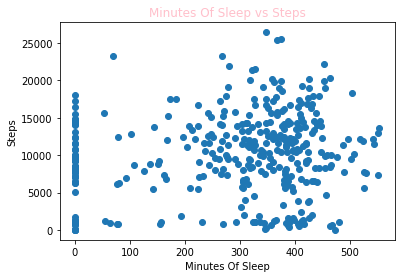

In [84]:
plt.scatter(fitbit['MinutesOfSleep'],fitbit['Steps'])
plt.title('Minutes Of Sleep vs Steps', color='pink')
plt.xlabel('Minutes Of Sleep')
plt.ylabel('Steps')
plt.show()

In [ ]:
"""
We can say that there is a small correlation because the dots are wide spread. 
"""

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [89]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [91]:
cor_fit = fitbit[columns]
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
0,1934,905,0,1.355,0,384
1,3631,18925,4,611.000,60,454
2,3204,14228,1,602.000,77,387
3,2673,6756,8,749.000,4,311
4,2495,502,1,876.000,0,407
...,...,...,...,...,...,...
362,3796,18588,16,599.000,79,377
363,3525,16382,16,684.000,55,406
364,3649,21913,19,701.000,90,280
365,3539,19023,15,575.000,85,370


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [93]:
cor_fit = cor_fit.sort_values(by="Steps", ascending=False)
cor_fit.corr()

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


In [ ]:
"""
Minutes Very Active is the highest correlated item with Steps. 
"""

# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [ ]:
# your code here

#### Show visually the frequency distribution of the `time_grades` dataset.

In [ ]:
# your code here

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [ ]:
# your code here

In [ ]:
"""
your commments here
"""

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

In [ ]:
# your code here

In [ ]:
"""
your commments here
"""

#### Could you explain the difference between Pearson and Spearman correlations?

In [ ]:
"""
your commments here
"""